# Unsupervised Learning Techniques

In [51]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use("default")
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter

from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

pd.options.mode.chained_assignment = None

## Olivetti dataset

In [2]:
# Load data
data = fetch_olivetti_faces()
X, y = data["data"] , data["target"]

df = pd.DataFrame(X, index = [i for i in range(len(X))], 
                  columns = ["feature_" + str(i+1) for i in range(X.shape[1])])

df["target"] = y

df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_4088,feature_4089,feature_4090,feature_4091,feature_4092,feature_4093,feature_4094,feature_4095,feature_4096,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0


In [3]:
# Split data
sss = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)

train_idx_list = []
test_idx_list = []

# Add to np.array
for index_train, index_test in sss.split(X,y):
    train_idx_list.append(index_train)
    test_idx_list.append(index_test)
    
train_idx_list = np.array(train_idx_list)
test_idx_list = np.array(test_idx_list)
    
# Test datasets
X_train_val, y_train_val = df.iloc[index_train, 0:-1], df.iloc[index_train, -1]
X_test, y_test = df.iloc[index_test, 0:-1], df.iloc[index_test, -1]

# Train and validation dataset
sss = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)

train_idx_list = []
val_idx_list = []

# Add to np.array
for index_train, index_val in sss.split(X_train_val,y_train_val):
    train_idx_list.append(index_train)
    val_idx_list.append(index_val)

# Train arrays
X_train, y_train = X_train_val.iloc[index_train], y_train_val.iloc[index_train]
# Validation arrays
X_val, y_val = X_train_val.iloc[index_val], y_train_val.iloc[index_val]

In [4]:
# Dimensions
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


### Train K-Means

In [5]:
# Parameters to test
k_params = range(50, 150, 10)

k_mean_list = []

# Run Kmeans and append to list
for i in k_params:
    k_means = KMeans(n_clusters = i, random_state = 202).fit(X_train)
    k_mean_list.append(k_means)

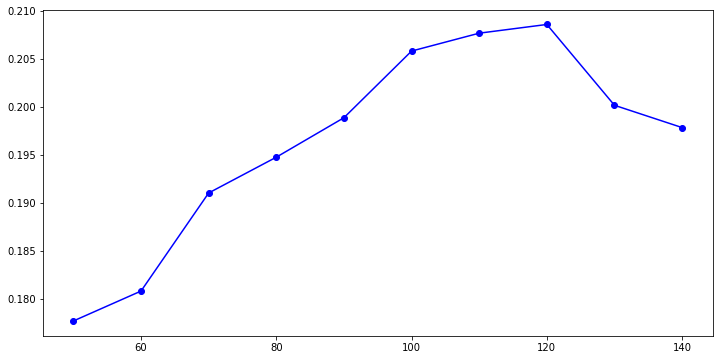

In [6]:
# Calculate silhouette score and plot graph

d = {"k_param": [i for i in k_params], 
                        "silhouette_score": [silhouette_score(X_train, i.labels_) for i in k_mean_list]}

# Make dataframe
sil_graph = pd.DataFrame(data = d)

# Plot 
plt.figure(figsize = (12,6))
plt.plot(sil_graph["k_param"], sil_graph["silhouette_score"], "bo-")

We can see that $k=120$ maximises the silhouette's score.

In [44]:
# Rerun model with k=120
best_kmeans = KMeans(n_clusters = 120, random_state = 202).fit(X_train)

# Model prediction
print(best_kmeans.labels_)

[ 31   0  20  45 100  96  78  81  18 108  81  39  19  32  52  55  52 114
  29  66  47  44   0  37  94  82  19  50 103 118 108 117  10 118  54  40
  78 112  18  27  68  92  20  79 119  20  77   6  53  85  13  67  64  41
  50   1  23  13  26 109  11  65   8  63  42   2  37   7  10  70 113  56
  33  30 111   4  24  70  61  33  34  30  35  65  77  18  31 115  90  17
  21   2   5  43  64  70  67  45  50  12  69  42  81   4   0  16  98   5
   0  53  87  45  33  62  98  52  10  25  40  74  12  20  37 100 104  96
  80  73  97  11   0  60  87  94 119  57 118  61  66  27  22  78  41  76
  13  95  36  91  75  50  46  85 110  98  51  19   4  86 106  55   9  16
  49  84  13  11 106   5   1   1  65   6 119  14  93  89  82  43 101  35
  17  71  81  24  75  51  29  49   7   2  73  61 109   6  80  94  35  62
  54  52  89  62 105 110  14  47  34  59   2  95 103  18  60  19  71  99
   7  39  15  72  22 118  37  99  53   1 100  21  70  26  79  23  31  27
  88  47  46  44  34  93  31  24  40  54  37   9 10

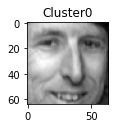

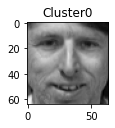

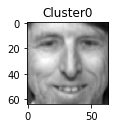

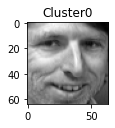

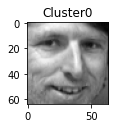

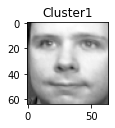

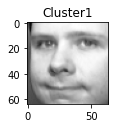

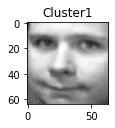

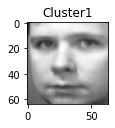

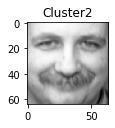

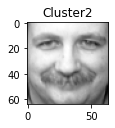

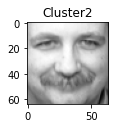

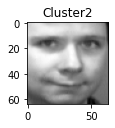

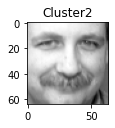

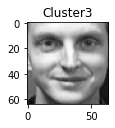

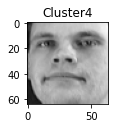

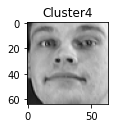

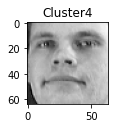

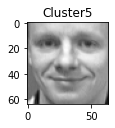

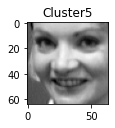

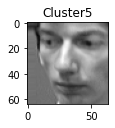

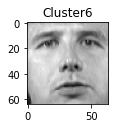

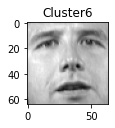

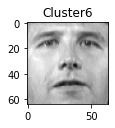

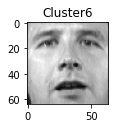

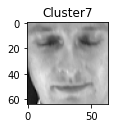

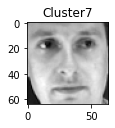

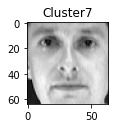

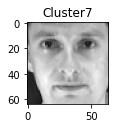

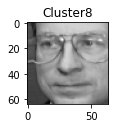

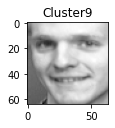

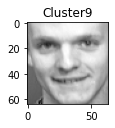

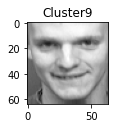

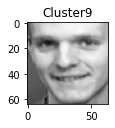

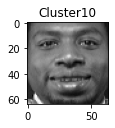

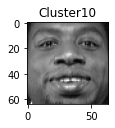

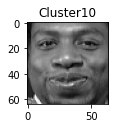

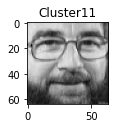

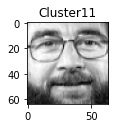

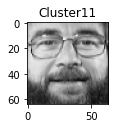

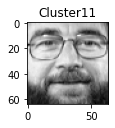

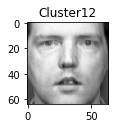

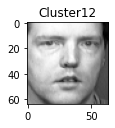

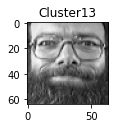

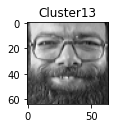

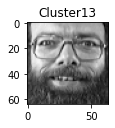

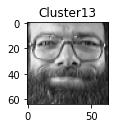

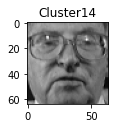

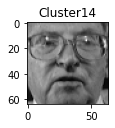

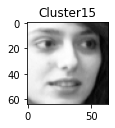

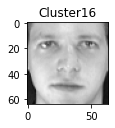

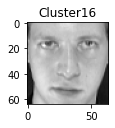

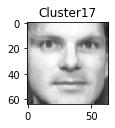

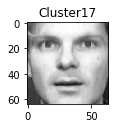

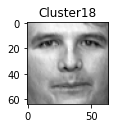

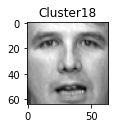

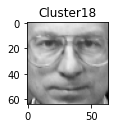

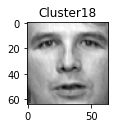

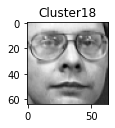

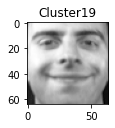

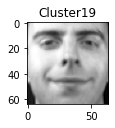

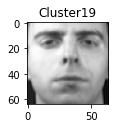

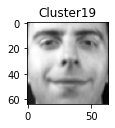

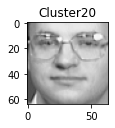

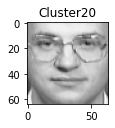

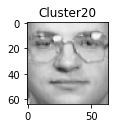

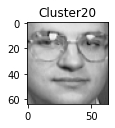

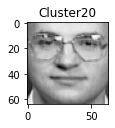

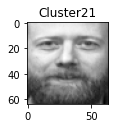

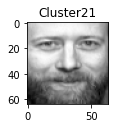

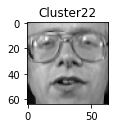

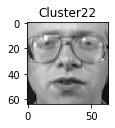

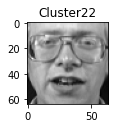

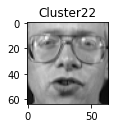

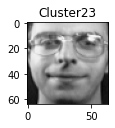

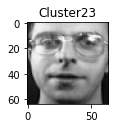

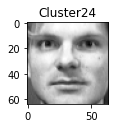

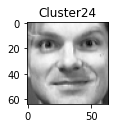

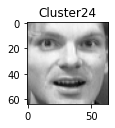

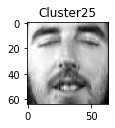

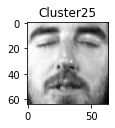

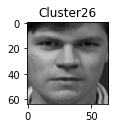

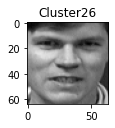

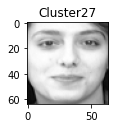

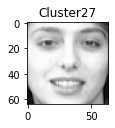

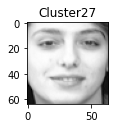

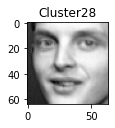

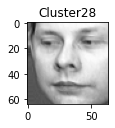

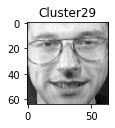

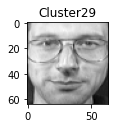

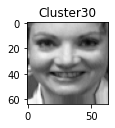

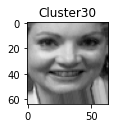

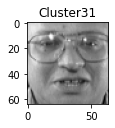

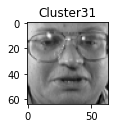

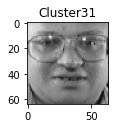

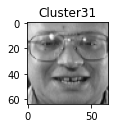

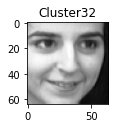

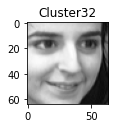

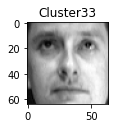

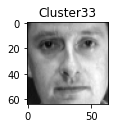

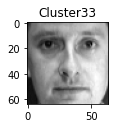

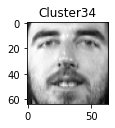

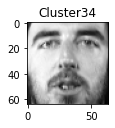

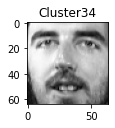

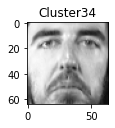

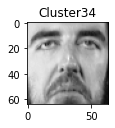

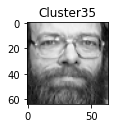

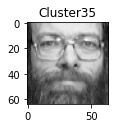

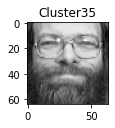

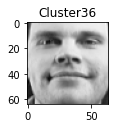

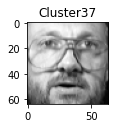

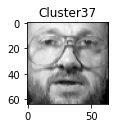

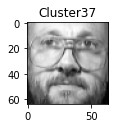

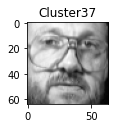

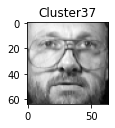

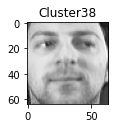

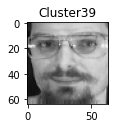

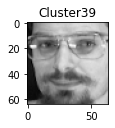

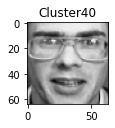

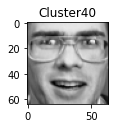

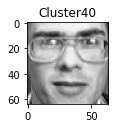

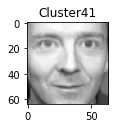

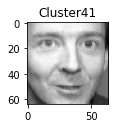

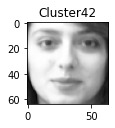

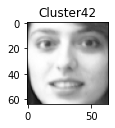

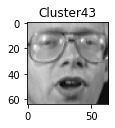

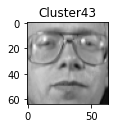

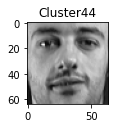

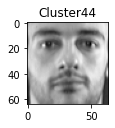

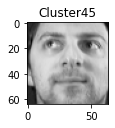

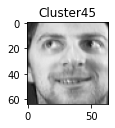

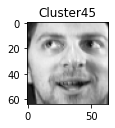

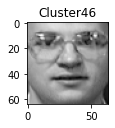

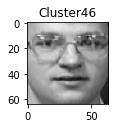

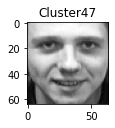

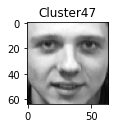

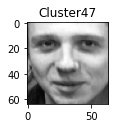

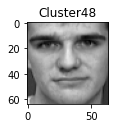

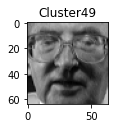

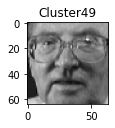

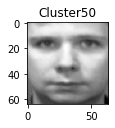

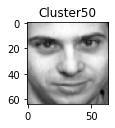

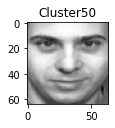

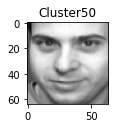

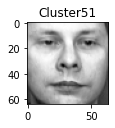

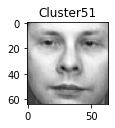

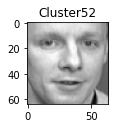

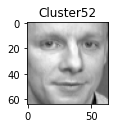

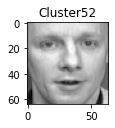

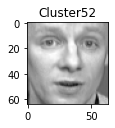

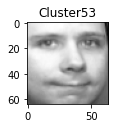

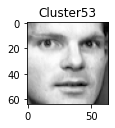

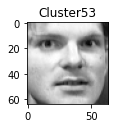

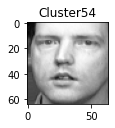

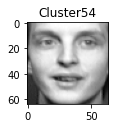

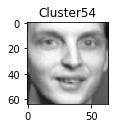

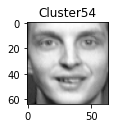

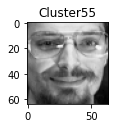

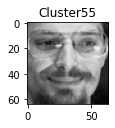

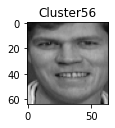

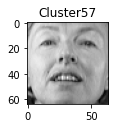

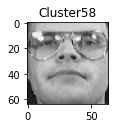

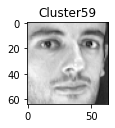

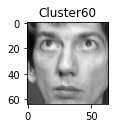

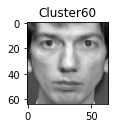

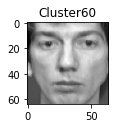

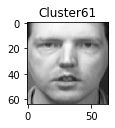

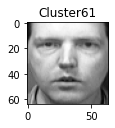

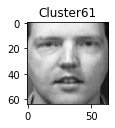

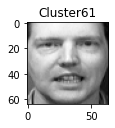

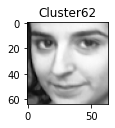

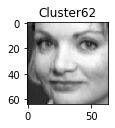

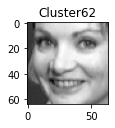

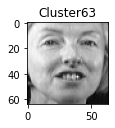

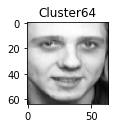

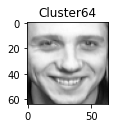

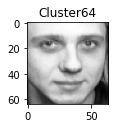

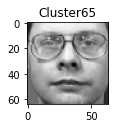

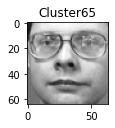

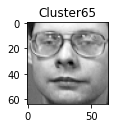

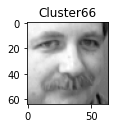

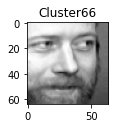

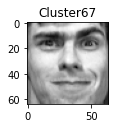

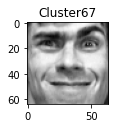

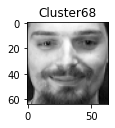

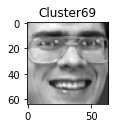

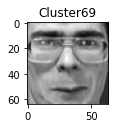

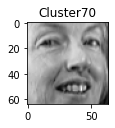

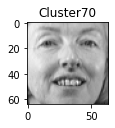

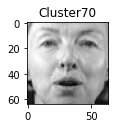

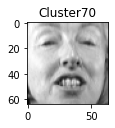

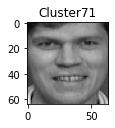

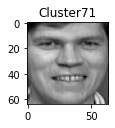

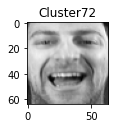

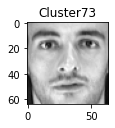

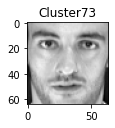

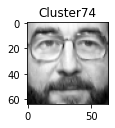

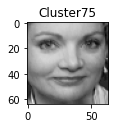

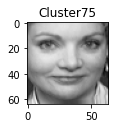

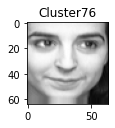

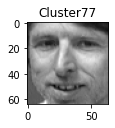

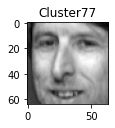

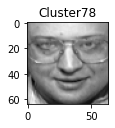

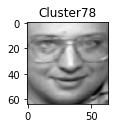

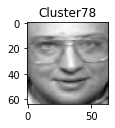

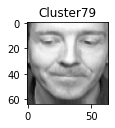

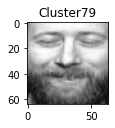

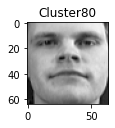

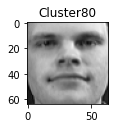

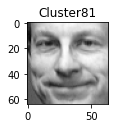

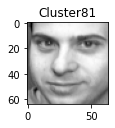

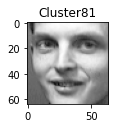

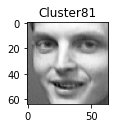

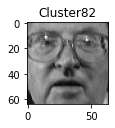

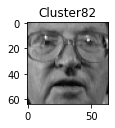

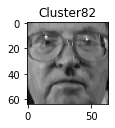

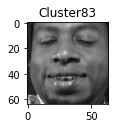

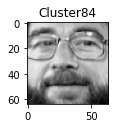

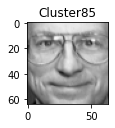

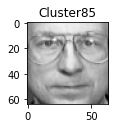

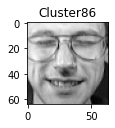

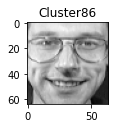

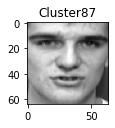

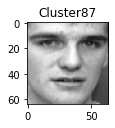

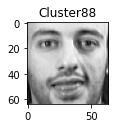

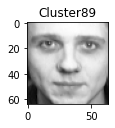

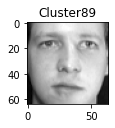

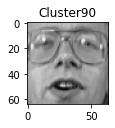

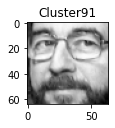

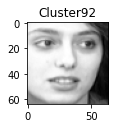

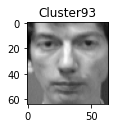

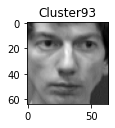

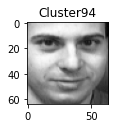

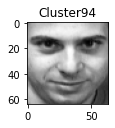

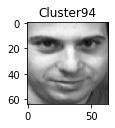

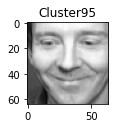

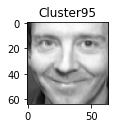

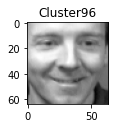

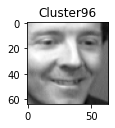

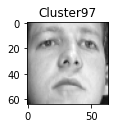

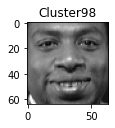

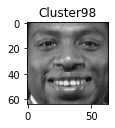

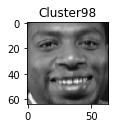

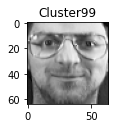

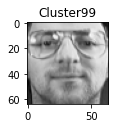

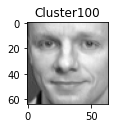

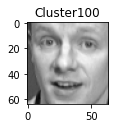

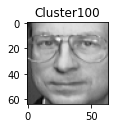

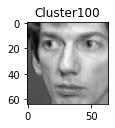

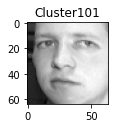

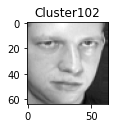

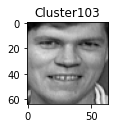

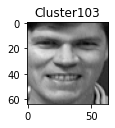

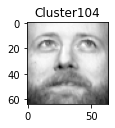

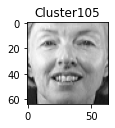

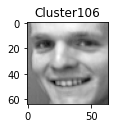

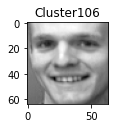

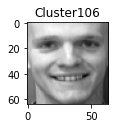

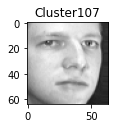

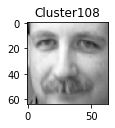

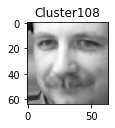

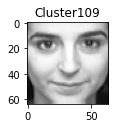

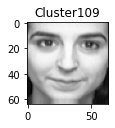

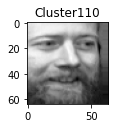

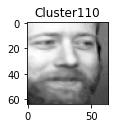

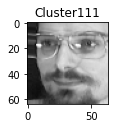

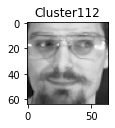

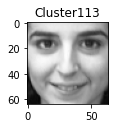

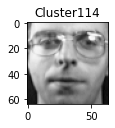

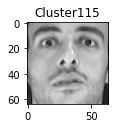

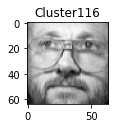

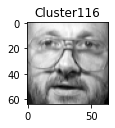

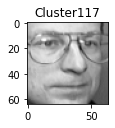

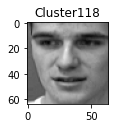

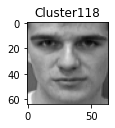

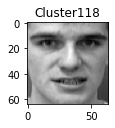

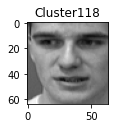

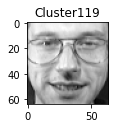

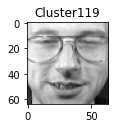

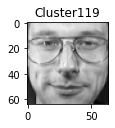

In [102]:
# Plot graph of similar faces
X_train_graph = X_train
X_train_graph["label"] = best_kmeans.labels_

for i in np.unique(best_kmeans.labels_):
    X = X_train_graph[X_train_graph["label"]==i]
    X = X.iloc[:,0:-1]

    #Plot
    for index, rows in X.iterrows():
        plt.figure(figsize = (1.5,1.5))
        plt.title("Cluster" + str(i))
        plt.imshow(rows.values.reshape(-1,64), cmap = "gray")
        plt.show()

In [53]:
X_train_graph

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_4088,feature_4089,feature_4090,feature_4091,feature_4092,feature_4093,feature_4094,feature_4095,feature_4096,label
304,0.702479,0.743802,0.772727,0.772727,0.764463,0.772727,0.793388,0.805785,0.789256,0.793388,...,0.446281,0.512397,0.574380,0.297521,0.012397,0.194215,0.219008,0.458678,0.636364,31
381,0.355372,0.392562,0.446281,0.462810,0.475207,0.491736,0.500000,0.504132,0.520661,0.545455,...,0.132231,0.111570,0.140496,0.165289,0.169421,0.173554,0.173554,0.181818,0.185950,0
54,0.330579,0.409091,0.549587,0.599174,0.619835,0.607438,0.623967,0.665289,0.702479,0.752066,...,0.636364,0.669421,0.677686,0.677686,0.694215,0.698347,0.698347,0.702479,0.599174,20
68,0.231405,0.223140,0.206612,0.206612,0.198347,0.181818,0.219008,0.223140,0.231405,0.318182,...,0.367769,0.409091,0.462810,0.504132,0.603306,0.549587,0.289256,0.194215,0.227273,45
206,0.227273,0.322314,0.396694,0.409091,0.442149,0.491736,0.512397,0.524793,0.545455,0.541322,...,0.512397,0.528926,0.512397,0.491736,0.504132,0.520661,0.504132,0.487603,0.450413,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,0.632231,0.652893,0.582645,0.636364,0.636364,0.706612,0.747934,0.780992,0.793388,0.814050,...,0.285124,0.272727,0.210744,0.231405,0.223140,0.107438,0.082645,0.090909,0.090909,116
17,0.586777,0.595041,0.681818,0.694215,0.714876,0.698347,0.714876,0.727273,0.743802,0.739669,...,0.380165,0.400826,0.330579,0.148760,0.119835,0.123967,0.115702,0.119835,0.107438,22
286,0.280992,0.190083,0.190083,0.198347,0.247934,0.322314,0.442149,0.533058,0.582645,0.623967,...,0.454545,0.297521,0.293388,0.297521,0.314050,0.301653,0.305785,0.318182,0.318182,60
45,0.338843,0.404959,0.508264,0.524793,0.578512,0.623967,0.652893,0.657025,0.657025,0.673554,...,0.561983,0.590909,0.590909,0.590909,0.582645,0.599174,0.582645,0.570248,0.549587,9
